In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_white
from sklearn.model_selection import cross_validate, ShuffleSplit


df = pd.read_csv('C:/Users/User/Documents/Flatiron/Phase2/cleaned_data.csv')
df2 = pd.read_csv('C:/Users/User/Documents/Flatiron/Phase2/final_df.csv')

# Baseline Model

In order to begin my analysis, I first have to create a baseline model using the raw data.

In [102]:
df = df.drop(columns = ['Unnamed: 0', 'id', 'sqft_living15', 'sqft_lot15'])

In [106]:
df

,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,has_renovated,zipcode,lat,long
0,10,221900,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0,1950,0,98178,47.5112,-122.257
1,12,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1950,1,98125,47.7210,-122.319
2,2,180000,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1930,0,98028,47.7379,-122.233
3,12,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1960,0,98136,47.5208,-122.393
4,2,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1980,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21137,5,360000,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0,2000,0,98103,47.6993,-122.346
21138,2,400000,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0,2010,0,98146,47.5107,-122.362
21139,6,402101,2,1.00,1020,1350,2.0,0.0,0.0,3,7,1020,0,2000,0,98144,47.5944,-122.299
21140,1,400000,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0,2000,0,98027,47.5345,-122.069


In [103]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [104]:
formula

'price~Month+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+has_renovated+zipcode+lat+long'

In [105]:
model1 = ols(formula=formula, data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2743.
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:09:18   Log-Likelihood:            -2.5574e+05
No. Observations:               18748   AIC:                         5.115e+05
Df Residuals:                   18731   BIC:                         5.117e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.946e+06   3.12e+06      2.550      0.011    1.84e+06    1.41e+07
Month         -3052.2864    476.924     -6.400      0.000   -3987.101   -2117.472
bedrooms      -4.086e+04   2151.915    -18.988      0.000   -4.51e+04   -3.66e+04
bathrooms      4.116e+04   3546.227     11.608      0.000    3.42e+04    4.81e+04
sqft_living     119.9235      2.324     51.608      0.000     115.369     124.478
sqft_lot         -0.0814      0.038     -2.136      0.033      -0.156      -0.007
floors         5340.9601   3880.346      1.376      0.169   -2264.870    1.29e+04
waterfront      6.04e+05   1.89e+04     32.022      0.000    5.67e+05    6.41e+05
view           5.386e+04   2302.880     23.386      0.000    4.93e+04    5.84e+04
condition      2.754e+04   2542.663     10.831      0.000    2.26e+04    3.25e+04
grade          9.802e+04   2236.824     43.823      0.000    9.36e+04    1.02e+05
sqft_above       77.8899      2.314     33.655      0.000      73.354      82.426
sqft_basement    42.0332      2.871     14.639      0.000      36.405      47.661
yr_built      -2615.0283     77.451    -33.764      0.000   -2766.839   -2463.217
has_renovated  4.327e+04   8653.518      5.000      0.000    2.63e+04    6.02e+04
zipcode        -595.1064     35.637    -16.699      0.000    -664.958    -525.255
lat            6.061e+05   1.16e+04     52.129      0.000    5.83e+05    6.29e+05
long          -2.134e+05    1.4e+04    -15.216      0.000   -2.41e+05   -1.86e+05
==============================================================================
Omnibus:                    15745.730   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1542035.812
Skew:                           3.501   Prob(JB):                         0.00
Kurtosis:                      46.875   Cond. No.                     1.24e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.2e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model 1: Observations

- <b>R-Squared</b>: The R-squared value of the baseline model is 0.701. This is a a good sign because it indicates a high level of correlation between the dependent variable ```price``` and the other independent variables listed.
- <b>High P-Values</b>: There is one instance of a high P-value in this model. In the case for this variable, there is insufficient evidences to conclude that changes to these variables will have an impact to the dependent variable, ```price```, at the population level.
1. ```floors```: P = 0.169

# Linear Regression Model

Now that I have made my baseline model, I can create the next iteration to dig deeper using the data that I have cleaned and manipulated previously.

In [6]:
df2

,Unnamed: 0,id,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,zipcode_3.Quad_3,zipcode_4.Quad_4,zipcode_5.Quad_5,zipcode_6.Quad_6,zipcode_7.Quad_7,zipcode_8.Quad_8,zipcode_9.Quad_9,zipcode_10.Quad_10,zipcode_11.Quad_11,zipcode_12.Quad_12
0,0,7129300520,10,221900,3,1.00,1180,5650,1.0,NaN,...,0,0,1,0,0,0,0,0,0,0
1,1,6414100192,12,538000,3,2.25,2570,7242,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,5631500400,2,180000,2,1.00,770,10000,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2487200875,12,604000,4,3.00,1960,5000,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,4,1954400510,2,510000,3,2.00,1680,8080,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21137,21137,263000018,5,360000,3,2.50,1530,1131,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21138,21138,6600060120,2,400000,4,2.50,2310,5813,2.0,0.0,...,0,1,0,0,0,0,0,0,0,0
21139,21139,1523300141,6,402101,2,1.00,1020,1350,2.0,0.0,...,0,0,1,0,0,0,0,0,0,0
21140,21140,291310100,1,400000,3,2.50,1600,2388,2.0,NaN,...,0,0,1,0,0,0,0,0,0,0


In [7]:
df2.columns = df2.columns.str.replace(".","")

In [8]:
df2

,Unnamed: 0,id,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,zipcode_3Quad_3,zipcode_4Quad_4,zipcode_5Quad_5,zipcode_6Quad_6,zipcode_7Quad_7,zipcode_8Quad_8,zipcode_9Quad_9,zipcode_10Quad_10,zipcode_11Quad_11,zipcode_12Quad_12
0,0,7129300520,10,221900,3,1.00,1180,5650,1.0,NaN,...,0,0,1,0,0,0,0,0,0,0
1,1,6414100192,12,538000,3,2.25,2570,7242,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,5631500400,2,180000,2,1.00,770,10000,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2487200875,12,604000,4,3.00,1960,5000,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,4,1954400510,2,510000,3,2.00,1680,8080,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21137,21137,263000018,5,360000,3,2.50,1530,1131,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21138,21138,6600060120,2,400000,4,2.50,2310,5813,2.0,0.0,...,0,1,0,0,0,0,0,0,0,0
21139,21139,1523300141,6,402101,2,1.00,1020,1350,2.0,0.0,...,0,0,1,0,0,0,0,0,0,0
21140,21140,291310100,1,400000,3,2.50,1600,2388,2.0,NaN,...,0,0,1,0,0,0,0,0,0,0


In [9]:
df2.columns

Index(['Unnamed: 0', 'id', 'Month', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_basement', 'yr_built', 'has_renovated', 'zipcode', 'lat',
       'long', 'quarter_bins', 'bedroom_bins', 'bathrooms_bins', 'floors_bins',
       'grade_bins', 'age_bins', 'zipcode_quad_bins', 'quarter_2Q2',
       'quarter_3Q3', 'quarter_4Q4', 'bedrooms_2Medium', 'bedrooms_3Large',
       'bathroom_2Medium', 'bathroom_3Large', 'floors_2Two', 'floors_3Three',
       'Waterfront_10', 'View_1', 'View_2', 'View_3', 'View_4', 'Condition_2',
       'Condition_3', 'Condition_4', 'Condition_5', 'grade_2Average',
       'grade_3AboveAverage', 'grade_4Excellent', 'age_2Modern', 'age_3New',
       'Has_Renovated_1', 'zipcode_2Quad_2', 'zipcode_3Quad_3',
       'zipcode_4Quad_4', 'zipcode_5Quad_5', 'zipcode_6Quad_6',
       'zipcode_7Quad_7', 'zipcode_8Quad_8', 'zipcode_9Quad_9',
       'zipcode_10Quad_10', 'zipcode_11Quad_11', '

In [10]:
outcome = 'price'
model2_df= df2.drop(columns = ['Unnamed: 0', 'id', 'Month', 'bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition',
       'grade','yr_built', 'has_renovated', 'zipcode','sqft_basement', 'sqft_lot', 'quarter_bins', 'bedroom_bins',
       'bathrooms_bins', 'floors_bins', 'grade_bins', 'age_bins',
       'zipcode_quad_bins', 'lat', 'long'], axis=1)
predictors = model2_df.drop(columns = ['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula1 = outcome + '~' + pred_sum

In [11]:
formula1

'price~sqft_living+quarter_2Q2+quarter_3Q3+quarter_4Q4+bedrooms_2Medium+bedrooms_3Large+bathroom_2Medium+bathroom_3Large+floors_2Two+floors_3Three+Waterfront_10+View_1+View_2+View_3+View_4+Condition_2+Condition_3+Condition_4+Condition_5+grade_2Average+grade_3AboveAverage+grade_4Excellent+age_2Modern+age_3New+Has_Renovated_1+zipcode_2Quad_2+zipcode_3Quad_3+zipcode_4Quad_4+zipcode_5Quad_5+zipcode_6Quad_6+zipcode_7Quad_7+zipcode_8Quad_8+zipcode_9Quad_9+zipcode_10Quad_10+zipcode_11Quad_11+zipcode_12Quad_12'

In [12]:
model2 = ols(formula=formula1, data=model2_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     1484.
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:33:53   Log-Likelihood:            -2.8762e+05
No. Observations:               21142   AIC:                         5.753e+05
Df Residuals:                   21105   BIC:                         5.756e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.469e+05   3.74e+04      3.924      0.000    7.35e+04     2.2e+05
sqft_living           184.7916      2.600     71.081      0.000     179.696     189.887
quarter_2Q2          -471.8077   3925.857     -0.120      0.904   -8166.787    7223.172
quarter_3Q3          -2.05e+04   4038.527     -5.075      0.000   -2.84e+04   -1.26e+04
quarter_4Q4          -2.12e+04   4228.637     -5.012      0.000   -2.95e+04   -1.29e+04
bedrooms_2Medium    -2.948e+04   4521.209     -6.520      0.000   -3.83e+04   -2.06e+04
bedrooms_3Large      -8.05e+04   1.23e+04     -6.529      0.000   -1.05e+05   -5.63e+04
bathroom_2Medium    -8691.4894   4038.277     -2.152      0.031   -1.66e+04    -776.157
bathroom_3Large      6.155e+05   3.23e+04     19.048      0.000    5.52e+05    6.79e+05
floors_2Two          1.434e+04   4216.732      3.401      0.001    6077.409    2.26e+04
floors_3Three        4.848e+04   9319.416      5.202      0.000    3.02e+04    6.67e+04
Waterfront_10        5.501e+05   2.02e+04     27.297      0.000    5.11e+05     5.9e+05
View_1               1.071e+05   1.11e+04      9.674      0.000    8.54e+04    1.29e+05
View_2                7.71e+04   6745.509     11.429      0.000    6.39e+04    9.03e+04
View_3               1.449e+05   9181.643     15.782      0.000    1.27e+05    1.63e+05
View_4                2.94e+05   1.39e+04     21.224      0.000    2.67e+05    3.21e+05
Condition_2          2.155e+04   4.01e+04      0.537      0.591    -5.7e+04       1e+05
Condition_3          2.369e+04   3.72e+04      0.636      0.525   -4.93e+04    9.67e+04
Condition_4          6.616e+04   3.73e+04      1.775      0.076   -6902.018    1.39e+05
Condition_5          1.108e+05   3.75e+04      2.956      0.003    3.73e+04    1.84e+05
grade_2Average       3.845e+04   5013.683      7.669      0.000    2.86e+04    4.83e+04
grade_3AboveAverage   1.92e+05   7159.086     26.826      0.000    1.78e+05    2.06e+05
grade_4Excellent     5.894e+05   1.28e+04     46.110      0.000    5.64e+05    6.14e+05
age_2Modern          -3.82e+04   4366.684     -8.747      0.000   -4.68e+04   -2.96e+04
age_3New            -2095.4963   7174.805     -0.292      0.770   -1.62e+04     1.2e+04
Has_Renovated_1      1.074e+05   7715.041     13.925      0.000    9.23e+04    1.23e+05
zipcode_2Quad_2     -3.258e+04   5083.934     -6.408      0.000   -4.25e+04   -2.26e+04
zipcode_3Quad_3     -1.497e+05   1.23e+04    -12.161      0.000   -1.74e+05   -1.26e+05
zipcode_4Quad_4      1983.7440   5306.280      0.374      0.709   -8416.970    1.24e+04
zipcode_5Quad_5      1.752e+04   4860.986      3.604      0.000    7992.495     2.7e+04
zipcode_6Quad_6     -1.299e+05   8410.663    -15.449      0.000   -1.46e+05   -1.13e+05
zipcode_7Quad_7     -2.255e+05   7632.273    -29.543      0.000    -2.4e+05   -2.11e+05
zip

## Model 2: General Observations (drop either all or none of the bins and remove original variables used to create dummies)
- <b>R-Squared</b>: The R-squared value of this linear regression model is 0.717.
- <b>High P-Values</b>: There are multiple instances of high P-values in this model. In the case for these variables, there is insufficient evidences to conclude that changes to these variables will have an impact to the dependent variable, ```price```, at the population level.
1. ```quarter_2Q2```: P = 0.904
2. ```Condition_2```: P = 0.591
3. ```Condition_3```: P = 0.525
4. ```Condition_4```: P = 0.076
5. ```age_3New```: P = 0.770
6. ```zipcode_4Quad_4```: P = 0.709

## Differences From Model 1: 
- <b>R-Squared</b>: Overall this is an improvement from the Baseline Model (Model 1) based on the R-squared value being higher for Model 2 from 0.701 to 0.717 respectively.
- <b>High P-Values</b>: There was a significant increase to the number of variables with a P-value greater than the threshold 0.050 in Model 2, 20 instances, compared to Model 1, 1 instance. This high frequency of collinearity may be a result of the introduction of manipulated data.
- There were some differences to the coefficient values between the two models, but nothing changed drastically that merits a special note. The main difference regarding the coefficient values were the additional insights from the dummy created from the categorical variables identified during the 'Data Understanding' section of this analysis. These additional informations provide insight into the specific breakdown of the changing coefficient values within the category by each individual unit instead of the category overall specifically in the ```Month```, ```bedrooms```, ```bathrooms```, ```floors```, ```grade```, ```yr_built```, and ```zipcode``` variables.

## Model Validation
Next, I want to check that my models are usable based on whether they meet the requirements of assumption for linear regression.

In [13]:
model2.resid

0       -172044.858677
1       -208369.963447
2       -100308.544094
3          3007.261329
4         40659.276313
             ...      
21137   -103415.028724
21138   -211974.041157
21139     11374.896308
21140    -60208.429603
21141    -45002.159782
Length: 21142, dtype: float64

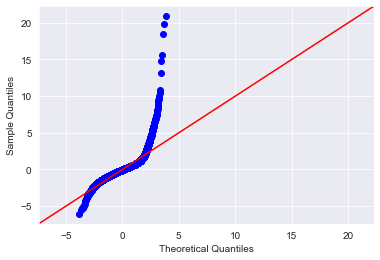

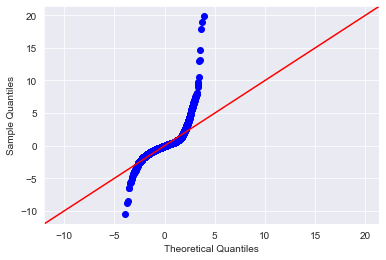

In [14]:
fig = sm.graphics.qqplot(model1.resid, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

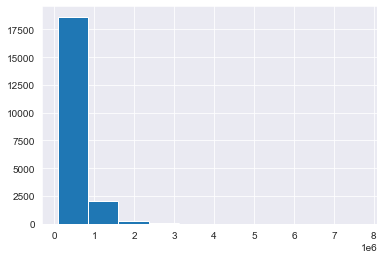

In [15]:
fig2=df.price.hist()

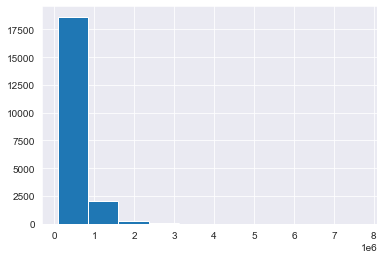

In [16]:
fig2=df2.price.hist()

## Assessment of Linear Regression
- <b>Linearity</b>: Based on the two figures above, it is shown that there is little linearity present due to the occurence of outliers which distort the scatterplots to resemble a cubic parabola curve. <font color='red'>As a result, these models fail to prove linearity</font>.
- <b>Homoscedasticity</b>: Based on the two figures above, it is shown that there is little homoscedasticity present due to the high variance of distance between the plotted points and the regression lines which indicated a case of heteroscedasticity. <font color='red'>As a result, these models fail to prove homoscedasticity</font>.
- <b>Multicollinearity</b>: The models have an acceptable level of multicollinearity as mentioned under the 'Observations' section above. The occurances of high multicollinearity are not pervasive and frequent enough to fail this condition.
- <b>Autocorrelation</b>: To satisfy this condition, the analysis must show that there is little to no autocorrelation in the data. This can be determined by using the Durbin-Watson test to evaluate the 'd' value. If this value is between 1.5 < d < 2.5, we can argue that there is no auto-correlation in the data. Model 1 has a Durbin-Watson score of 1.988 and Model 2 has a Durbin-Watson score of 1996. <font color='green'>As a result, these two models satisfy the condition for autocorrelation</font>.
- <b>Normality</b>: Based on the two figures above, it is shown that the models fail to show the normality condition. For any fixed value of X, y is NOT normally distributed.<font color='red'>As a result, these models fail to prove normality</font>.

Based on this assessment, Model 1 and Model 2 have <font color='red'>failed</font> the assumptions of linear regression, and as a result are poor models to base this analysis on.

# Transforming Our Models
Since I have proved that both Model 1 and Model 2 have failed to meet the assumptions of linear regression, the data must be transformed in order to have a valid model. I have decided to use a logarithmic transformation for the following reasons:

- Lack of linearity
- Heteroscedasticity
- High level of skew resulting in a non-normal distribution

In [17]:
# The ```price``` variable will be transformed using a logarithmic function.

model2_df['log_price'] = np.log(model2_df.price)
outcome = 'log_price'
model3_df= model2_df
predictors = model3_df.drop(columns = ['price','log_price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula2 = outcome + '~' + pred_sum

In [18]:
model3_df.columns

Index(['price', 'sqft_living', 'quarter_2Q2', 'quarter_3Q3', 'quarter_4Q4',
       'bedrooms_2Medium', 'bedrooms_3Large', 'bathroom_2Medium',
       'bathroom_3Large', 'floors_2Two', 'floors_3Three', 'Waterfront_10',
       'View_1', 'View_2', 'View_3', 'View_4', 'Condition_2', 'Condition_3',
       'Condition_4', 'Condition_5', 'grade_2Average', 'grade_3AboveAverage',
       'grade_4Excellent', 'age_2Modern', 'age_3New', 'Has_Renovated_1',
       'zipcode_2Quad_2', 'zipcode_3Quad_3', 'zipcode_4Quad_4',
       'zipcode_5Quad_5', 'zipcode_6Quad_6', 'zipcode_7Quad_7',
       'zipcode_8Quad_8', 'zipcode_9Quad_9', 'zipcode_10Quad_10',
       'zipcode_11Quad_11', 'zipcode_12Quad_12', 'log_price'],
      dtype='object')

In [19]:
model3 = ols(formula=formula2, data=model3_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     1973.
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:33:54   Log-Likelihood:                -864.42
No. Observations:               21142   AIC:                             1803.
Df Residuals:                   21105   BIC:                             2097.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.2735      0.048    254.735      0.000      12.179      12.368
sqft_living             0.0003   3.35e-06     77.679      0.000       0.000       0.000
quarter_2Q2             0.0046      0.005      0.903      0.366      -0.005       0.014
quarter_3Q3            -0.0294      0.005     -5.660      0.000      -0.040      -0.019
quarter_4Q4            -0.0364      0.005     -6.686      0.000      -0.047      -0.026
bedrooms_2Medium       -0.0124      0.006     -2.127      0.033      -0.024      -0.001
bedrooms_3Large        -0.1128      0.016     -7.111      0.000      -0.144      -0.082
bathroom_2Medium        0.0405      0.005      7.786      0.000       0.030       0.051
bathroom_3Large        -0.1300      0.042     -3.125      0.002      -0.211      -0.048
floors_2Two             0.0235      0.005      4.339      0.000       0.013       0.034
floors_3Three           0.0244      0.012      2.036      0.042       0.001       0.048
Waterfront_10           0.3926      0.026     15.140      0.000       0.342       0.443
View_1                  0.1677      0.014     11.776      0.000       0.140       0.196
View_2                  0.1429      0.009     16.459      0.000       0.126       0.160
View_3                  0.1976      0.012     16.723      0.000       0.174       0.221
View_4                  0.2853      0.018     16.007      0.000       0.250       0.320
Condition_2             0.0366      0.052      0.710      0.478      -0.064       0.138
Condition_3             0.1510      0.048      3.151      0.002       0.057       0.245
Condition_4             0.2341      0.048      4.879      0.000       0.140       0.328
Condition_5             0.2990      0.048      6.197      0.000       0.204       0.394
grade_2Average          0.2026      0.006     31.396      0.000       0.190       0.215
grade_3AboveAverage     0.4253      0.009     46.157      0.000       0.407       0.443
grade_4Excellent        0.5465      0.016     33.220      0.000       0.514       0.579
age_2Modern            -0.0222      0.006     -3.952      0.000      -0.033      -0.011
age_3New                0.0326      0.009      3.529      0.000       0.014       0.051
Has_Renovated_1         0.1462      0.010     14.722      0.000       0.127       0.166
zipcode_2Quad_2        -0.0610      0.007     -9.316      0.000      -0.074      -0.048
zipcode_3Quad_3        -0.2972      0.016    -18.769      0.000      -0.328      -0.266
zipcode_4Quad_4        -0.0479      0.007     -7.021      0.000      -0.061      -0.035
zipcode_5Quad_5        -0.0344      0.006     -5.504      0.000      -0.047      -0.022
zipcode_6Quad_6        -0.1962      0.011    -18.129      0.000      -0.217      -0.175
zipcode_7Quad_7        -0.4726      0.010    -48.116      0.000      -0.492      -0.453
zip

## Model 3: General Observations

- <b>R-Squared</b>: The R-squared value of this linear regression model is 0.771.
- <b>P-Values</b>: There are two instances of high P-values in this model. In the case for these variables, there is insufficient evidences to conclude that changes to these variables will have an impact to the dependent variable, ```price```, at the population level.
1. ```quarter_2Q2```: P = 0.366
2. ```Condition_2```: P = 0.478


## Differences From Model 1 and Model 2: 
- <b>R-squared</b>: The R-squared values for this new, transformed Model 3 has increased to 0.771 from Model 1, 0.701, and Model 2, 0.717. This increase indicates that the new model fits the observed data better than the previous models.
- <b>P-Values</b>: The number of P-values which exceeded the threshold of 0.050 decreased in Model 3, 2 instances, from Model 2, 6 instances, and increased compared to Model 1, 1 instance. This indicates that cases of collinearity dropped due to the transformation.
- <b>Coefficient</b>: The coefficient values for this model have dropped considerably, but this is to be expected as the data was transformed using a logarithmic function. In order to interpret this change, the following formula can be applied to understand the change: ```log('price') = Intercept + B1 * IV + Error``` which translates to 'One unit increase in the independent variable is associated with a ```B1 * 100``` percent increase in the ```price```.

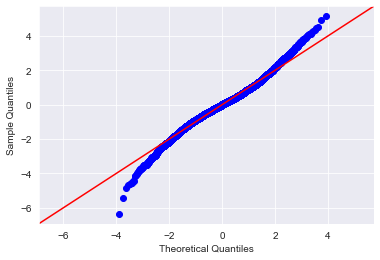

In [20]:
fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True)

<AxesSubplot:>

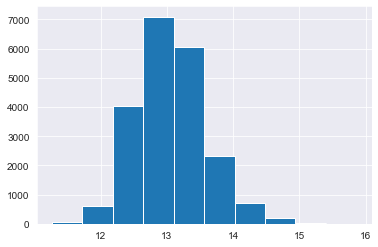

In [21]:
model3_df.log_price.hist()

### Assessment of Linear Regression
- <b>Linearity</b>: Based on the figure above, <font color='green'>it is shown that there is linearity present</font>.
- <b>Homoscedasticity</b>: Based on the figure above, it is shown that it is <font color='green'>homoscedastic</font> due to the low variance of distance between the plotted points and the regression line.
- <b>Multicollinearity</b>: This model has an <font color='green'>acceptable level of multicollinearity</font>. The occurances of high multicollinearity are not pervasive and frequent enough to fail this condition.
- <b>Autocorrelation</b>: To satisfy this condition, the analysis must show that there is little to no autocorrelation in the data. This can be determined by using the Durbin-Watson test to evaluate the 'd' value. If this value is between 1.5 < d < 2.5, we can argue that there is no auto-correlation in the data. This model has a Durbin-Watson score of 1.999. <font color='green'>As a result, these two models satisfy the condition for autocorrelation</font>.
- <b>Normality</b>: Based on the figure above, <font color='green'>it is shown that the model meets the normality condition</font>.

Based on this assessment, Model 3 has <font color='green'>passed</font> the assumptions of linear regression, and as a result is a viable model to base this analysis on.

# Training Model 3
Now that our log transformation of our model has satisfied the conditions for linear regression, some additional insight needs to be made on the validity of the model by conducting a train-test-split to determine if this model is over or underfitting.

In [22]:
# Reduce the number of outliers to make our predictive model more accurate to the sample.
model3_df = model3_df[model3_df['price'] < 2000000]

In [23]:
model3_df

,price,sqft_living,quarter_2Q2,quarter_3Q3,quarter_4Q4,bedrooms_2Medium,bedrooms_3Large,bathroom_2Medium,bathroom_3Large,floors_2Two,...,zipcode_4Quad_4,zipcode_5Quad_5,zipcode_6Quad_6,zipcode_7Quad_7,zipcode_8Quad_8,zipcode_9Quad_9,zipcode_10Quad_10,zipcode_11Quad_11,zipcode_12Quad_12,log_price
0,221900,1180,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,12.309982
1,538000,2570,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,13.195614
2,180000,770,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.100712
3,604000,1960,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,13.311329
4,510000,1680,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21137,360000,1530,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,12.793859
21138,400000,2310,0,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,12.899220
21139,402101,1020,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,12.904459
21140,400000,1600,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,12.899220


In [24]:
# Clean the data further by dropping any NaN values that would impede the analysis.
# Drop the dependent variables from analysis.
model3_df = model3_df.dropna()
y = model3_df.log_price
X = model3_df.drop(columns = ['price', 'log_price'], axis=1)

In [25]:
# Set up the training/testing samples.
from sklearn.model_selection import train_test_split
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#Execute training model.
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_3, y_train_3)


LinearRegression()

In [27]:
linreg.coef_

array([ 2.57935602e-04,  8.53307334e-03, -2.74093674e-02, -3.74612529e-02,
       -1.45544346e-02, -1.23480889e-01,  3.95374623e-02, -2.22036715e-01,
        2.00489241e-02,  2.39070923e-02,  3.79159823e-01,  1.54094566e-01,
        1.36197573e-01,  1.87852349e-01,  2.78628469e-01,  3.79946813e-02,
        1.38863596e-01,  2.19949659e-01,  2.83902340e-01,  2.03392109e-01,
        4.19212411e-01,  4.79063267e-01, -1.61411922e-02,  3.50225412e-02,
        1.51616786e-01, -5.96179457e-02, -2.90623171e-01, -5.07085918e-02,
       -3.99298088e-02, -1.92395960e-01, -4.71611176e-01, -5.21796828e-01,
       -2.99089099e-01, -6.58584195e-01, -6.15887832e-01, -5.65226161e-01])

In [28]:
y_hat_train_3 = linreg.predict(X_train_3)
y_hat_test_3 = linreg.predict(X_test_3)

In [29]:
y_hat_test_3 = np.exp(y_hat_test_3)
y_hat_train_3 = np.exp(y_hat_train_3)

In [30]:
y_test_3 = np.exp(y_test_3)
y_train_3 = np.exp(y_train_3)

In [31]:
y_test_3

6065     1040000.0
11716     839900.0
16594     465000.0
20635     255500.0
17481     335000.0
           ...    
11932     560000.0
1320      729953.0
20072     719950.0
8080      228950.0
17736     292000.0
Name: log_price, Length: 4188, dtype: float64

In [32]:
y_hat_test_3

array([994147.67571284, 874495.54315565, 509521.50659598, ...,
       920002.92495172, 224583.64655229, 285006.33473947])

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
# Evaluate the mean squared error of the train set.
mean_squared_error(y_train_3, y_hat_train_3, squared=False)

152591.38194435032

In [35]:
# Evaluate the mean squared error of the test set.
mean_squared_error(y_test_3, y_hat_test_3, squared=False)

158195.01390051047

Awesome! It does not seem like there is a big difference between the train and test MSE. This indicates to me that this is a model with good fit.

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test_3, y_hat_test_3)

0.7011810575986777

The R-squared value validates my assessment that this model has good fit.

## Conclusions
```model3``` appears to be a usable model for predictions. 
- <b>Limitations</b>: There appears to be several limitations to my model:
    1. Houses with a <b>price > $2,000,000</b>.
    2. The variables ```quarter_bins``` and ```condition_bins``` should be assessed on whether or not to be included due to their high P-values.

# Identifying The Significant Features
Next it's important to identify which variables are significant for use in my predictive analysis.

In [37]:
# Drop the variables identified with high P-values in the previous conclusion.
model3_df['log_price'] = np.log(model3_df.price)
model4_df = model3_df
outcome = 'log_price'
predictors = model4_df.drop(columns = ['price','log_price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula3 = outcome + '~' + pred_sum

In [38]:
model4 = ols(formula=formula3, data=model4_df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     1768.
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:33:55   Log-Likelihood:                -550.28
No. Observations:               20938   AIC:                             1175.
Df Residuals:                   20901   BIC:                             1469.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.2771      0.047    258.485      0.000      12.184      12.370
sqft_living             0.0003   3.42e-06     75.581      0.000       0.000       0.000
quarter_2Q2             0.0054      0.005      1.081      0.280      -0.004       0.015
quarter_3Q3            -0.0289      0.005     -5.622      0.000      -0.039      -0.019
quarter_4Q4            -0.0355      0.005     -6.587      0.000      -0.046      -0.025
bedrooms_2Medium       -0.0118      0.006     -2.055      0.040      -0.023      -0.001
bedrooms_3Large        -0.1097      0.016     -6.851      0.000      -0.141      -0.078
bathroom_2Medium        0.0389      0.005      7.555      0.000       0.029       0.049
bathroom_3Large        -0.2781      0.056     -4.975      0.000      -0.388      -0.169
floors_2Two             0.0230      0.005      4.260      0.000       0.012       0.034
floors_3Three           0.0277      0.012      2.325      0.020       0.004       0.051
Waterfront_10           0.3992      0.030     13.413      0.000       0.341       0.457
View_1                  0.1609      0.014     11.244      0.000       0.133       0.189
View_2                  0.1421      0.009     16.381      0.000       0.125       0.159
View_3                  0.1921      0.012     16.100      0.000       0.169       0.216
View_4                  0.2602      0.019     13.753      0.000       0.223       0.297
Condition_2             0.0337      0.051      0.662      0.508      -0.066       0.133
Condition_3             0.1492      0.047      3.159      0.002       0.057       0.242
Condition_4             0.2322      0.047      4.912      0.000       0.140       0.325
Condition_5             0.2953      0.048      6.208      0.000       0.202       0.389
grade_2Average          0.2029      0.006     31.873      0.000       0.190       0.215
grade_3AboveAverage     0.4187      0.009     45.811      0.000       0.401       0.437
grade_4Excellent        0.4823      0.017     28.107      0.000       0.449       0.516
age_2Modern            -0.0178      0.006     -3.183      0.001      -0.029      -0.007
age_3New                0.0334      0.009      3.636      0.000       0.015       0.051
Has_Renovated_1         0.1412      0.010     14.207      0.000       0.122       0.161
zipcode_2Quad_2        -0.0597      0.006     -9.231      0.000      -0.072      -0.047
zipcode_3Quad_3        -0.2918      0.016    -18.626      0.000      -0.322      -0.261
zipcode_4Quad_4        -0.0494      0.007     -7.316      0.000      -0.063      -0.036
zipcode_5Quad_5        -0.0393      0.006     -6.347      0.000      -0.051      -0.027
zipcode_6Quad_6        -0.1910      0.011    -17.851      0.000      -0.212      -0.170
zipcode_7Quad_7        -0.4700      0.010    -48.377      0.000      -0.489      -0.451
zip

In [39]:
model4_df.columns

Index(['price', 'sqft_living', 'quarter_2Q2', 'quarter_3Q3', 'quarter_4Q4',
       'bedrooms_2Medium', 'bedrooms_3Large', 'bathroom_2Medium',
       'bathroom_3Large', 'floors_2Two', 'floors_3Three', 'Waterfront_10',
       'View_1', 'View_2', 'View_3', 'View_4', 'Condition_2', 'Condition_3',
       'Condition_4', 'Condition_5', 'grade_2Average', 'grade_3AboveAverage',
       'grade_4Excellent', 'age_2Modern', 'age_3New', 'Has_Renovated_1',
       'zipcode_2Quad_2', 'zipcode_3Quad_3', 'zipcode_4Quad_4',
       'zipcode_5Quad_5', 'zipcode_6Quad_6', 'zipcode_7Quad_7',
       'zipcode_8Quad_8', 'zipcode_9Quad_9', 'zipcode_10Quad_10',
       'zipcode_11Quad_11', 'zipcode_12Quad_12', 'log_price'],
      dtype='object')

In [40]:
# The following variables have been deemed as potentially significant based on their low P-values.
significant_features=['sqft_living', 'quarter_2Q2', 'quarter_3Q3',
       'quarter_4Q4', 'bedrooms_2Medium', 'bedrooms_3Large',
       'bathroom_2Medium', 'bathroom_3Large', 'floors_2Two', 'floors_3Three',
       'Waterfront_10', 'View_1', 'View_2', 'View_3', 'View_4', 'Condition_2',
       'Condition_3', 'Condition_4', 'Condition_5', 'grade_2Average',
       'grade_3AboveAverage', 'grade_4Excellent', 'age_2Modern', 'age_3New',
       'Has_Renovated_1', 'zipcode_2Quad_2', 'zipcode_3Quad_3',
       'zipcode_4Quad_4', 'zipcode_5Quad_5', 'zipcode_6Quad_6',
       'zipcode_7Quad_7', 'zipcode_8Quad_8', 'zipcode_9Quad_9',
       'zipcode_10Quad_10', 'zipcode_11Quad_11', 'zipcode_12Quad_12']
len(significant_features)

36

In [42]:
X_train_3

,sqft_living,quarter_2Q2,quarter_3Q3,quarter_4Q4,bedrooms_2Medium,bedrooms_3Large,bathroom_2Medium,bathroom_3Large,floors_2Two,floors_3Three,...,zipcode_3Quad_3,zipcode_4Quad_4,zipcode_5Quad_5,zipcode_6Quad_6,zipcode_7Quad_7,zipcode_8Quad_8,zipcode_9Quad_9,zipcode_10Quad_10,zipcode_11Quad_11,zipcode_12Quad_12
17206,2520,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1391,1500,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18930,4065,0,1,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
12621,1060,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8631,1710,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11384,1320,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12068,2550,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5444,1680,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
872,3000,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Assessing the validity of the proposed significant features.
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
fourth_model = LinearRegression()
X_train_fourth_model = X_train_3[significant_features]

fourth_model_scores = cross_validate(
    estimator=fourth_model,
    X=X_train_fourth_model,
    y=y_train_3,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()

Current Model
Train score:      0.7157085209362483
Validation score: 0.7174622673397408



In [44]:
# Double checking each variable's significance
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
X_train_for_RFECV = StandardScaler().fit_transform(X_train_fourth_model)
model_for_RFECV = LinearRegression()

selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train_3)

print('Was the column selected?')
for index, col in enumerate(X_train_fourth_model.columns):
    print(f'{col}: {selector.support_[index]}')

Was the column selected?
sqft_living: True
quarter_2Q2: False
quarter_3Q3: True
quarter_4Q4: True
bedrooms_2Medium: True
bedrooms_3Large: True
bathroom_2Medium: True
bathroom_3Large: True
floors_2Two: True
floors_3Three: True
Waterfront_10: True
View_1: True
View_2: True
View_3: True
View_4: True
Condition_2: False
Condition_3: False
Condition_4: True
Condition_5: True
grade_2Average: True
grade_3AboveAverage: True
grade_4Excellent: True
age_2Modern: True
age_3New: False
Has_Renovated_1: True
zipcode_2Quad_2: True
zipcode_3Quad_3: True
zipcode_4Quad_4: False
zipcode_5Quad_5: True
zipcode_6Quad_6: True
zipcode_7Quad_7: True
zipcode_8Quad_8: True
zipcode_9Quad_9: True
zipcode_10Quad_10: True
zipcode_11Quad_11: True
zipcode_12Quad_12: True


In [108]:
# There were a few variables that failed to meet the requirement for a significant variable.
# However, the frequency of them occuring within each bin for some (```quarter_bins``` and ```zipcode_bins```,
# was not significant enough to disclude entirely. This was not the case with ```age_bins``` and```condition_bins```
# as half the variables in the bin failed to prove significance.
significant_features1=['sqft_living','quarter_2Q2', 'quarter_3Q3',
       'quarter_4Q4', 'bedrooms_2Medium', 'bedrooms_3Large',
       'bathroom_2Medium', 'floors_2Two', 'floors_3Three',
       'Waterfront_10', 'View_1', 'View_2', 'View_3', 'View_4',
       'grade_2Average', 'grade_3AboveAverage', 'grade_4Excellent','Has_Renovated_1', 'zipcode_2Quad_2', 'zipcode_3Quad_3','zipcode_4Quad_4', 'zipcode_5Quad_5','zipcode_6Quad_6',
       'zipcode_7Quad_7','zipcode_8Quad_8','zipcode_9Quad_9','zipcode_10Quad_10','zipcode_11Quad_11','zipcode_12Quad_12']

In [109]:
sig_feat_df = pd.DataFrame()

In [110]:
sig_feat_df= sig_feat_df.fillna(0)

In [111]:
sig_feat_df

""


In [112]:
from itertools import combinations

features = significant_features1

for feature in features:
    scores = cross_validate(
    estimator=fourth_model,
    X=X_train_3[[feature]],
    y=y_train_3,
    return_train_score=True,
    cv=splitter
    )
    
    sig_feat_df = sig_feat_df.append({
        feature: 'yes',
        'train_score': scores['train_score'].mean(),
        'val_score': scores['test_score'].mean()
    }, ignore_index=True)

for (feature1, feature2) in list(combinations(features[0:], 2)):
    scores = cross_validate(
    estimator=fourth_model,
    X=X_train_3[[feature1, feature2]],
    y=y_train_3,
    return_train_score=True,
    cv=splitter
    )
    
    sig_feat_df = sig_feat_df.append({
        feature1: 'yes',
        feature2: 'yes',
        'train_score': scores['train_score'].mean(),
        'val_score': scores['test_score'].mean()
    }, ignore_index=True)
    
for (feature1, feature2, feature3) in list(combinations(features[0:], 3)):
    scores = cross_validate(
    estimator=fourth_model,
    X=X_train_3[[feature1, feature2, feature3]],
    y=y_train_3,
    return_train_score=True,
    cv=splitter
    )
    
    sig_feat_df = sig_feat_df.append({
        feature1: 'yes',
        feature2: 'yes',
        feature3: 'yes',
        'train_score': scores['train_score'].mean(),
        'val_score': scores['test_score'].mean()
    }, ignore_index=True)
    
    sig_feat_df = sig_feat_df.append({
        feature1: 'yes', feature2:'yes',feature3:'yes',
        'train_score': fourth_model_scores['train_score'].mean(),
        'val_score': fourth_model_scores['test_score'].mean()    
    }, ignore_index=True)


sig_feat_df[' '] = 'yes'
sig_feat_df.fillna('no', inplace=True)
sig_feat_df

,sqft_living,train_score,val_score,quarter_2Q2,quarter_3Q3,quarter_4Q4,bedrooms_2Medium,bedrooms_3Large,bathroom_2Medium,floors_2Two,...,zipcode_4Quad_4,zipcode_5Quad_5,zipcode_6Quad_6,zipcode_7Quad_7,zipcode_8Quad_8,zipcode_9Quad_9,zipcode_10Quad_10,zipcode_11Quad_11,zipcode_12Quad_12,
0,yes,0.462542,0.456774,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,yes
1,no,0.001253,0.001209,yes,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,yes
2,no,0.000035,-0.000186,no,yes,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,yes
3,no,0.000671,-0.000296,no,no,yes,no,no,no,no,...,no,no,no,no,no,no,no,no,no,yes
4,no,0.019735,0.018411,no,no,no,yes,no,no,no,...,no,no,no,no,no,no,no,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738,no,0.715709,0.717462,no,no,no,no,no,no,no,...,no,no,no,no,no,yes,yes,no,yes,yes
7739,no,0.038498,0.040449,no,no,no,no,no,no,no,...,no,no,no,no,no,yes,no,yes,yes,yes
7740,no,0.715709,0.717462,no,no,no,no,no,no,no,...,no,no,no,no,no,yes,no,yes,yes,yes
7741,no,0.062568,0.064478,no,no,no,no,no,no,no,...,no,no,no,no,no,no,yes,yes,yes,yes


In [113]:
sig_feat_df.describe()

,train_score,val_score
count,7743.000000,7743.000000
mean,0.415686,0.416532
std,0.300427,0.301064
min,0.000035,-0.000356
25%,0.106496,0.102736
50%,0.477485,0.473150
75%,0.715709,0.717462
max,0.715709,0.717462


In [114]:
train_score_3 = sig_feat_df.sort_values(by = ['train_score', 'sqft_living', 'grade_3AboveAverage', 'zipcode_4Quad_4'], ascending = False)
train_score_3

,sqft_living,train_score,val_score,quarter_2Q2,quarter_3Q3,quarter_4Q4,bedrooms_2Medium,bedrooms_3Large,bathroom_2Medium,floors_2Two,...,zipcode_4Quad_4,zipcode_5Quad_5,zipcode_6Quad_6,zipcode_7Quad_7,zipcode_8Quad_8,zipcode_9Quad_9,zipcode_10Quad_10,zipcode_11Quad_11,zipcode_12Quad_12,
1018,yes,0.715709,0.717462,no,no,no,no,no,no,no,...,yes,no,no,no,no,no,no,no,no,yes
462,yes,0.715709,0.717462,yes,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,yes
514,yes,0.715709,0.717462,no,yes,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,yes
564,yes,0.715709,0.717462,no,no,yes,no,no,no,no,...,no,no,no,no,no,no,no,no,no,yes
612,yes,0.715709,0.717462,no,no,no,yes,no,no,no,...,no,no,no,no,no,no,no,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,no,0.000886,-0.000086,no,yes,yes,no,no,no,no,...,no,no,no,no,no,no,no,no,no,yes
3,no,0.000671,-0.000296,no,no,yes,no,no,no,no,...,no,no,no,no,no,no,no,no,no,yes
106,no,0.000614,0.000234,no,yes,no,no,no,no,no,...,no,no,no,no,no,yes,no,no,no,yes
25,no,0.000584,0.000196,no,no,no,no,no,no,no,...,no,no,no,no,no,yes,no,no,no,yes


In [115]:
print(train_score_3.iloc[0])

sqft_living                 yes
train_score            0.715709
val_score              0.717462
quarter_2Q2                  no
quarter_3Q3                  no
quarter_4Q4                  no
bedrooms_2Medium             no
bedrooms_3Large              no
bathroom_2Medium             no
floors_2Two                  no
floors_3Three                no
Waterfront_10                no
View_1                       no
View_2                       no
View_3                       no
View_4                       no
grade_2Average               no
grade_3AboveAverage         yes
grade_4Excellent             no
Has_Renovated_1              no
zipcode_2Quad_2              no
zipcode_3Quad_3              no
zipcode_4Quad_4             yes
zipcode_5Quad_5              no
zipcode_6Quad_6              no
zipcode_7Quad_7              no
zipcode_8Quad_8              no
zipcode_9Quad_9              no
zipcode_10Quad_10            no
zipcode_11Quad_11            no
zipcode_12Quad_12            no
        

Based on this cross validation, it was found that the three best combination of significant features identified are ```sqft_living```, ```grade_bins```, and ```zipcode_bins```.

In [116]:
significant_features_2 = ["sqft_living", 'zipcode_2Quad_2', 'zipcode_3Quad_3', 'zipcode_4Quad_4', 'zipcode_5Quad_5', 'zipcode_6Quad_6', 'zipcode_7Quad_7', 'zipcode_8Quad_8', 'zipcode_9Quad_9', 'zipcode_10Quad_10', 'zipcode_11Quad_11', 'zipcode_12Quad_12', 'grade_2Average', 'grade_3AboveAverage', 'grade_4Excellent']

In [117]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
fifth_model = LinearRegression()
X_train_fifth_model = X_train_3[significant_features_2]

fifth_model_scores = cross_validate(
    estimator=fifth_model,
    X=X_train_fifth_model,
    y=y_train_3,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", fifth_model_scores["train_score"].mean())
print("Validation score:", fifth_model_scores["test_score"].mean())
print()
print("Third Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()

Current Model
Train score:      0.6712461731029155
Validation score: 0.6680235046164252

Third Model
Train score:      0.7157085209362483
Validation score: 0.7174622673397408



As shown by the above calculations, the drop off in R-squared values between my Model 3 variables and this new model with the significant feature variables was not significant. This new model with the significant features meets the requirements as I am satisfied with the performance of this model.

## Model 4
```model4``` will build off the findings of Model 3 as several variables were identified with high P-values which should not be included in the analysis. Additionally, this ```model4``` will only examine the significant features variables identified previously.

In [55]:
model4_df.columns

Index(['price', 'sqft_living', 'quarter_2Q2', 'quarter_3Q3', 'quarter_4Q4',
       'bedrooms_2Medium', 'bedrooms_3Large', 'bathroom_2Medium',
       'bathroom_3Large', 'floors_2Two', 'floors_3Three', 'Waterfront_10',
       'View_1', 'View_2', 'View_3', 'View_4', 'Condition_2', 'Condition_3',
       'Condition_4', 'Condition_5', 'grade_2Average', 'grade_3AboveAverage',
       'grade_4Excellent', 'age_2Modern', 'age_3New', 'Has_Renovated_1',
       'zipcode_2Quad_2', 'zipcode_3Quad_3', 'zipcode_4Quad_4',
       'zipcode_5Quad_5', 'zipcode_6Quad_6', 'zipcode_7Quad_7',
       'zipcode_8Quad_8', 'zipcode_9Quad_9', 'zipcode_10Quad_10',
       'zipcode_11Quad_11', 'zipcode_12Quad_12', 'log_price'],
      dtype='object')

In [56]:
model4_df['log_price'] = np.log(model4_df.price)
outcome = 'log_price'
final_model_df = model4_df.drop(columns = ['quarter_2Q2', 'quarter_3Q3', 'quarter_4Q4',
       'bedrooms_2Medium', 'bedrooms_3Large', 'bathroom_2Medium',
       'bathroom_3Large', 'floors_2Two', 'floors_3Three', 'Waterfront_10',
       'View_1', 'View_2', 'View_3', 'View_4', 'Condition_2', 'Condition_3',
       'Condition_4', 'Condition_5', 'age_2Modern', 'age_3New', 'Has_Renovated_1'], axis=1)
predictors = final_model_df.drop(columns = ['price','log_price'], axis =1)
pred_sum = '+'.join(predictors.columns)
formula2 = outcome + '~' + pred_sum

In [57]:
final_model = ols(formula=formula2, data=final_model_df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     3601.
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:38:12   Log-Likelihood:                -1825.6
No. Observations:               20938   AIC:                             3683.
Df Residuals:                   20922   BIC:                             3810.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.4304      0.008   1609.297      0.000      12.415      12.446
sqft_living             0.0003   3.04e-06     94.063      0.000       0.000       0.000
grade_2Average          0.2013      0.006     31.435      0.000       0.189       0.214
grade_3AboveAverage     0.4200      0.009     46.045      0.000       0.402       0.438
grade_4Excellent        0.4512      0.018     25.562      0.000       0.417       0.486
zipcode_2Quad_2        -0.0778      0.007    -11.698      0.000      -0.091      -0.065
zipcode_3Quad_3        -0.3378      0.016    -20.657      0.000      -0.370      -0.306
zipcode_4Quad_4        -0.0377      0.007     -5.330      0.000      -0.052      -0.024
zipcode_5Quad_5        -0.0355      0.006     -5.560      0.000      -0.048      -0.023
zipcode_6Quad_6        -0.2265      0.011    -20.542      0.000      -0.248      -0.205
zipcode_7Quad_7        -0.4331      0.010    -42.999      0.000      -0.453      -0.413
zipcode_8Quad_8        -0.5408      0.007    -80.875      0.000      -0.554      -0.528
zipcode_9Quad_9        -0.3321      0.017    -19.950      0.000      -0.365      -0.300
zipcode_10Quad_10      -0.6747      0.011    -61.727      0.000      -0.696      -0.653
zipcode_11Quad_11      -0.6297      0.009    -71.188      0.000      -0.647      -0.612
zipcode_12Quad_12      -0.5376      0.023    -23.053      0.000      -0.583      -0.492
==============================================================================
Omnibus:                      597.173   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1501.648
Skew:                           0.071   Prob(JB):                         0.00
Kurtosis:                       4.304   Cond. No.                     2.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model 4: General Observations

- <b>R-Squared</b>: The R-squared value of this linear regression model is 0.721.
- <b>P-Values</b>: There are zero cases of high P-values in this model. As a result, all the variables listed have sufficient evidence to conclude that changes to these variables will have an impact to the dependent variable, ```price```, at the population level.

## Differences From Model 1, Model 2, and Model 3: 
- <b>R-squared</b>: The R-squared values for this final Model 4 is 0.721. This R-squared value is lower than Model 3, 0.771, but in increase compared to Model 1, 0.701, and Model 2, 0.717. This decrease may be attributed to the elimination of several variables from Model 3.
- <b>P-Values</b>: The number of P-values which exceeded the threshold of 0.050 for this new model is 0 which is lower than the previous 3 models shown.
- <b>Coefficient</b>: The coefficient values for Model 4 are similar to Model 3 in that the data was transformed using a logarithmic function. In order to interpret this change, the following formula can be applied to understand the change: ```log('price') = Intercept + B1 * IV + Error``` which translates to 'One unit increase in the independent variable is associated with a ```B1 * 100``` percent increase in the ```price```.

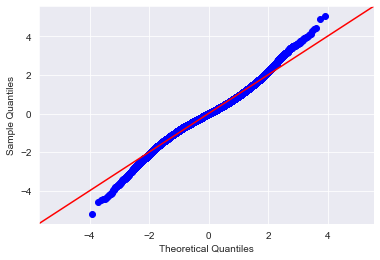

In [58]:
fig = sm.graphics.qqplot(final_model.resid, dist=stats.norm, line='45', fit=True)

### Assessment of Linear Regression
- <b>Linearity</b>: Based on the figure above, <font color='green'>it is shown that there is linearity present</font>.
- <b>Homoscedasticity</b>: Based on the figure above, it is shown that it is <font color='green'>homoscedastic</font> due to the low variance of distance between the plotted points and the regression line.
- <b>Multicollinearity</b>: This model has an <font color='green'>acceptable level of multicollinearity</font>. The occurances of high multicollinearity are not pervasive and frequent enough to fail this condition.
- <b>Autocorrelation</b>: To satisfy this condition, the analysis must show that there is little to no autocorrelation in the data. This can be determined by using the Durbin-Watson test to evaluate the 'd' value. If this value is between 1.5 < d < 2.5, we can argue that there is no auto-correlation in the data. This model has a Durbin-Watson score of 1.997. <font color='green'>As a result, these two models satisfy the condition for autocorrelation</font>.
- <b>Normality</b>: Based on the figure above, <font color='green'>it is shown that the model meets the normality condition</font>.

Based on this assessment, Model 3 has <font color='green'>passed</font> the assumptions of linear regression, and as a result is a viable model to base this analysis on.

## Training Model 4
Now that we have further refined our model, some additional insight needs to be made on the validity of the model by conducting a train-test-split to determine if this model is over or underfitting.

In [59]:
# Clean the data further by dropping any NaN values that would impede the analysis.
# Drop the dependent variables from analysis.
final_model_df=final_model_df.dropna()
y=final_model_df.log_price
X=final_model_df.drop(columns=['price','log_price'], axis=1)

In [60]:
# Set up the training/testing samples.
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
y_test_4

6065     13.854731
11716    13.641038
16594    13.049793
20635    12.450978
17481    12.721886
           ...    
11932    13.235692
1320     13.500735
20072    13.486937
8080     12.341259
17736    12.584509
Name: log_price, Length: 4188, dtype: float64

In [62]:
y_train_4

17206    12.623786
1391     13.180632
18930    14.483340
12621    12.660328
8631     12.776346
           ...    
11384    12.959844
12068    13.704579
5444     13.200065
872      13.514405
15939    13.676248
Name: log_price, Length: 16750, dtype: float64

In [63]:
X_train_4

,sqft_living,grade_2Average,grade_3AboveAverage,grade_4Excellent,zipcode_2Quad_2,zipcode_3Quad_3,zipcode_4Quad_4,zipcode_5Quad_5,zipcode_6Quad_6,zipcode_7Quad_7,zipcode_8Quad_8,zipcode_9Quad_9,zipcode_10Quad_10,zipcode_11Quad_11,zipcode_12Quad_12
17206,2520,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1391,1500,1,0,0,0,0,1,0,0,0,0,0,0,0,0
18930,4065,0,1,0,0,0,0,1,0,0,0,0,0,0,0
12621,1060,1,0,0,0,0,1,0,0,0,0,0,0,0,0
8631,1710,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11384,1320,1,0,0,0,0,0,1,0,0,0,0,0,0,0
12068,2550,0,1,0,0,0,0,1,0,0,0,0,0,0,0
5444,1680,1,0,0,0,0,0,1,0,0,0,0,0,0,0
872,3000,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [64]:
#Execute training model.
linreg1 = LinearRegression()
linreg1.fit(X_train_4, y_train_4)

LinearRegression()

In [65]:
linreg1.coef_

array([ 2.84368245e-04,  2.01052960e-01,  4.20708785e-01,  4.52624052e-01,
       -7.68103524e-02, -3.35417035e-01, -3.86742009e-02, -3.64474616e-02,
       -2.27532727e-01, -4.32459545e-01, -5.40892767e-01, -3.28833217e-01,
       -6.71821054e-01, -6.28305371e-01, -5.27771733e-01])

In [66]:
X_train_4.shape

(16750, 15)

In [67]:
X_test_4.shape

(4188, 15)

In [68]:
y_hat_train_4 = linreg1.predict(X_train_4)
y_hat_test_4 = linreg1.predict(X_test_4)

In [69]:
y_hat_train_4

array([13.27397908, 13.02205962, 13.97334673, ..., 13.07547264,
       13.63013166, 13.78708553])

In [70]:
y_hat_test_4 = np.exp(y_hat_test_4)
y_hat_train_4 = np.exp(y_hat_train_4)

In [71]:
y_test_4 = np.exp(y_test_4)
y_train_4 = np.exp(y_train_4)

In [72]:
y_test_4

6065     1040000.0
11716     839900.0
16594     465000.0
20635     255500.0
17481     335000.0
           ...    
11932     560000.0
1320      729953.0
20072     719950.0
8080      228950.0
17736     292000.0
Name: log_price, Length: 4188, dtype: float64

In [73]:
y_train_4

17206     303697.0
1391      530000.0
18930    1950000.0
12621     315000.0
8631      353750.0
           ...    
11384     425000.0
12068     895000.0
5444      540400.0
872       740000.0
15939     870000.0
Name: log_price, Length: 16750, dtype: float64

In [74]:
train_residuals = y_hat_train_4 - y_train_4
test_residuals = y_hat_test_4 - y_test_4

In [75]:
# Calculate training and test MSE
train_mse = mean_squared_error(y_train_4, y_hat_train_4, squared=False)
test_mse = mean_squared_error(y_test_4, y_hat_test_4, squared=False)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)


Train Mean Squarred Error: 166301.08115643743
Test Mean Squarred Error: 170112.7001369904


Interesting! It appears that the differences between the train and test sets are more prounounced in Model 4 when compared to the previous Model 3. I will need to calculate the R-squared score in order to determine whether the model is still within the threshold of a good fit.

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test_4, y_hat_test_4)

0.6544618383006306

The R-squared value exceeds the minimum threshold to still be a model with good fit. Awesome!

## Regression Model Validation
Next I want to assess whether ```model4``` has a good fit.

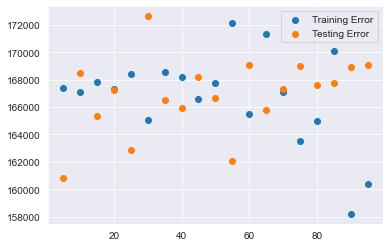

In [77]:
import random
random.seed(110)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=t_size/100)
    X_test_4 = X_test_4.fillna(0)
    X_train_4 = X_train_4.fillna(0)
    linreg1.fit(X_train_4, y_train_4)
    y_hat_train_4 = linreg1.predict(X_train_4)
    y_hat_test_4 = linreg1.predict(X_test_4)
    y_hat_test_4 = np.exp(y_hat_test_4)
    y_hat_train_4 = np.exp(y_hat_train_4)
    y_test_4 = np.exp(y_test_4)
    y_train_4 = np.exp(y_train_4)
    train_err.append(mean_squared_error(y_train_4, y_hat_train_4, squared=False))
    test_err.append(mean_squared_error(y_test_4, y_hat_test_4, squared=False))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()


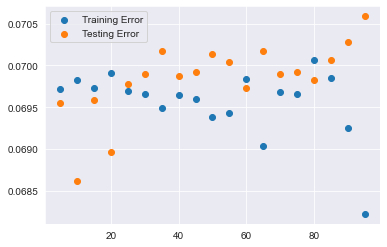

In [78]:
random.seed(900)

train_err=[]
test_err=[]
t_sizes = range(5,100,5)
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(10):
        X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size = t_size/100)
        X_test_4 = X_test_4.fillna(0)
        X_train_4 = X_train_4.fillna(0)
        linreg.fit(X_train_4, y_train_4)
        y_hat_train_4 = linreg.predict(X_train_4)
        y_hat_test_4 = linreg.predict(X_test_4)
        temp_train_err.append(mean_squared_error(y_train_4, y_hat_train_4))
        temp_test_err.append(mean_squared_error(y_test_4, y_hat_test_4))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label = 'Testing Error')
plt.legend()

Based on the two figures above this new model meets the requirements for having a good enough fit. 

# Business Problem
A group of realtors have decided to start up their own realty company using their industry knowledge of the real estate market in King's County. They have a plethora of experience as a group, but seem to lack the raw data information to inform them on which market they should specialize their new realty company on.
They have hired me to provide them some insight into the profitability of houses based on three variables: 
1. Square Footage
2. Grade of House
3. Zipcode

Based on the analysis conducted previously, I will be using my 'Final Model' to conduct my predictive analysis to provide recommendations to this new realty company to advise them on the three variables asked to examine:

In [79]:
best_features = ['sqft_living','grade_2Average','grade_3AboveAverage','grade_4Excellent','zipcode_2Quad_2','zipcode_3Quad_3','zipcode_4Quad_4','zipcode_5Quad_5','zipcode_6Quad_6','zipcode_7Quad_7','zipcode_8Quad_8','zipcode_9Quad_9','zipcode_10Quad_10','zipcode_11Quad_11','zipcode_12Quad_12']

In [80]:
X = final_model_df[best_features]
y = final_model_df.log_price
X = X.apply(pd.to_numeric, errors = 'coerce')
y = y.apply(pd.to_numeric, errors='coerce')
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
final_model = LinearRegression()
final_model.fit(X_train_final,y_train_final)
print(final_model.score(X_test_final, y_test_final))

0.7335784728485056


In [82]:
y_hat_train_final = final_model.predict(X_train_final)
y_hat_test_final = final_model.predict(X_test_final)

In [83]:
y_hat_test_final = np.exp(y_hat_test_final)
y_hat_train_final = np.exp(y_hat_train_final)

In [84]:
y_test_final = np.exp(y_test_final)
y_train_final = np.exp(y_train_final)

In [85]:
train_residuals = y_hat_train_final - y_train_final
test_residuals = y_hat_test_final - y_test_final

In [86]:
# Calculate training and test MSE
train_mse = mean_squared_error(y_train_final, y_hat_train_final, squared=False)
test_mse = mean_squared_error(y_test_final, y_hat_test_final, squared=False)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)


Train Mean Squarred Error: 166301.08115643743
Test Mean Squarred Error: 170112.7001369904


In [87]:
from sklearn.metrics import r2_score
r2_score(y_test_final, y_hat_test_final)

0.6544618383006306

In [90]:
y_hat_test_4 = np.exp(y_hat_test_4)
y_hat_train_4 = np.exp(y_hat_train_4)

In [91]:
print(pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients"))
print("Intercept:", final_model.intercept_)
print('Slope:', final_model.coef_)

sqft_living            0.000284
grade_2Average         0.201053
grade_3AboveAverage    0.420709
grade_4Excellent       0.452624
zipcode_2Quad_2       -0.076810
zipcode_3Quad_3       -0.335417
zipcode_4Quad_4       -0.038674
zipcode_5Quad_5       -0.036447
zipcode_6Quad_6       -0.227533
zipcode_7Quad_7       -0.432460
zipcode_8Quad_8       -0.540893
zipcode_9Quad_9       -0.328833
zipcode_10Quad_10     -0.671821
zipcode_11Quad_11     -0.628305
zipcode_12Quad_12     -0.527772
Name: Coefficients, dtype: float64
Intercept: 12.433128494706603
Slope: [ 2.84368245e-04  2.01052960e-01  4.20708785e-01  4.52624052e-01
 -7.68103524e-02 -3.35417035e-01 -3.86742009e-02 -3.64474616e-02
 -2.27532727e-01 -4.32459545e-01 -5.40892767e-01 -3.28833217e-01
 -6.71821054e-01 -6.28305371e-01 -5.27771733e-01]


In [197]:
final_model = ols(formula=formula2, data=final_model_df).fit()
final_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     3601.
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:59:29   Log-Likelihood:                -1825.6
No. Observations:               20938   AIC:                             3683.
Df Residuals:                   20922   BIC:                             3810.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.4304      0.008   1609.297      0.000      12.415      12.446
sqft_living             0.0003   3.04e-06     94.063      0.000       0.000       0.000
grade_2Average          0.2013      0.006     31.435      0.000       0.189       0.214
grade_3AboveAverage     0.4200      0.009     46.045      0.000       0.402       0.438
grade_4Excellent        0.4512      0.018     25.562      0.000       0.417       0.486
zipcode_2Quad_2        -0.0778      0.007    -11.698      0.000      -0.091      -0.065
zipcode_3Quad_3        -0.3378      0.016    -20.657      0.000      -0.370      -0.306
zipcode_4Quad_4        -0.0377      0.007     -5.330      0.000      -0.052      -0.024
zipcode_5Quad_5        -0.0355      0.006     -5.560      0.000      -0.048      -0.023
zipcode_6Quad_6        -0.2265      0.011    -20.542      0.000      -0.248      -0.205
zipcode_7Quad_7        -0.4331      0.010    -42.999      0.000      -0.453      -0.413
zipcode_8Quad_8        -0.5408      0.007    -80.875      0.000      -0.554      -0.528
zipcode_9Quad_9        -0.3321      0.017    -19.950      0.000      -0.365      -0.300
zipcode_10Quad_10      -0.6747      0.011    -61.727      0.000      -0.696      -0.653
zipcode_11Quad_11      -0.6297      0.009    -71.188      0.000      -0.647      -0.612
zipcode_12Quad_12      -0.5376      0.023    -23.053      0.000      -0.583      -0.492
==============================================================================
Omnibus:                      597.173   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1501.648
Skew:                           0.071   Prob(JB):                         0.00
Kurtosis:                       4.304   Cond. No.                     2.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

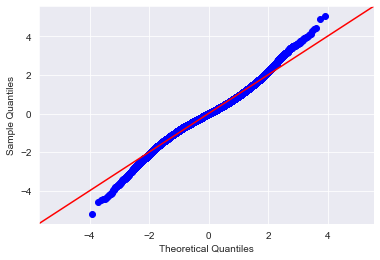

In [94]:
fig = sm.graphics.qqplot(final_model.resid, dist=stats.norm, line='45', fit=True)

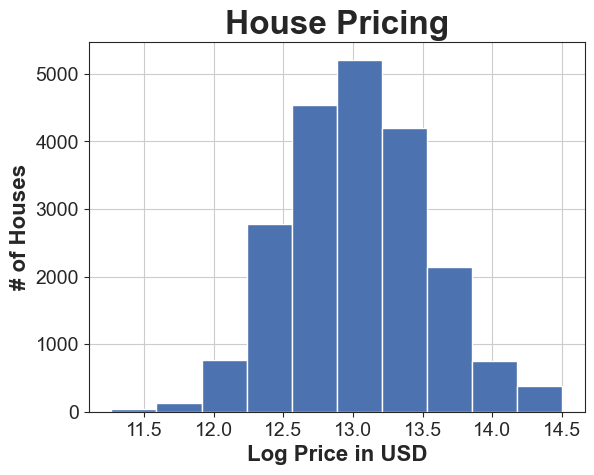

In [180]:
final_model_df.log_price.hist()
plt.title(label = 'House Pricing',  fontweight = 'bold', fontsize = 24)
plt.xlabel(xlabel = 'Log Price in USD',fontweight ='bold', fontsize = 16)
plt.ylabel(ylabel = '# of Houses', fontweight ='bold', fontsize = 16)
plt.savefig('Hist Price')

In [120]:
final_model.resid

0       -0.623171
1       -0.169990
2       -0.471756
3        0.157606
4        0.066226
           ...   
21137   -0.274747
21138   -0.354455
21139    0.016997
21140   -0.153875
21141   -0.195881
Length: 20938, dtype: float64

In [125]:
final_model_df[best_features]

,sqft_living,grade_2Average,grade_3AboveAverage,grade_4Excellent,zipcode_2Quad_2,zipcode_3Quad_3,zipcode_4Quad_4,zipcode_5Quad_5,zipcode_6Quad_6,zipcode_7Quad_7,zipcode_8Quad_8,zipcode_9Quad_9,zipcode_10Quad_10,zipcode_11Quad_11,zipcode_12Quad_12
0,1180,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2570,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,770,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1960,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1680,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21137,1530,1,0,0,0,0,0,0,0,0,0,0,0,0,0
21138,2310,1,0,0,0,0,1,0,0,0,0,0,0,0,0
21139,1020,1,0,0,0,0,0,1,0,0,0,0,0,0,0
21140,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [188]:
final_model_df.columns

Index(['price', 'sqft_living', 'grade_2Average', 'grade_3AboveAverage',
       'grade_4Excellent', 'zipcode_2Quad_2', 'zipcode_3Quad_3',
       'zipcode_4Quad_4', 'zipcode_5Quad_5', 'zipcode_6Quad_6',
       'zipcode_7Quad_7', 'zipcode_8Quad_8', 'zipcode_9Quad_9',
       'zipcode_10Quad_10', 'zipcode_11Quad_11', 'zipcode_12Quad_12',
       'log_price'],
      dtype='object')

In [163]:
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-deep')
plt.rc('ytick',labelsize=14)
plt.rc('xtick',labelsize=14)

<Figure size 640x480 with 0 Axes>

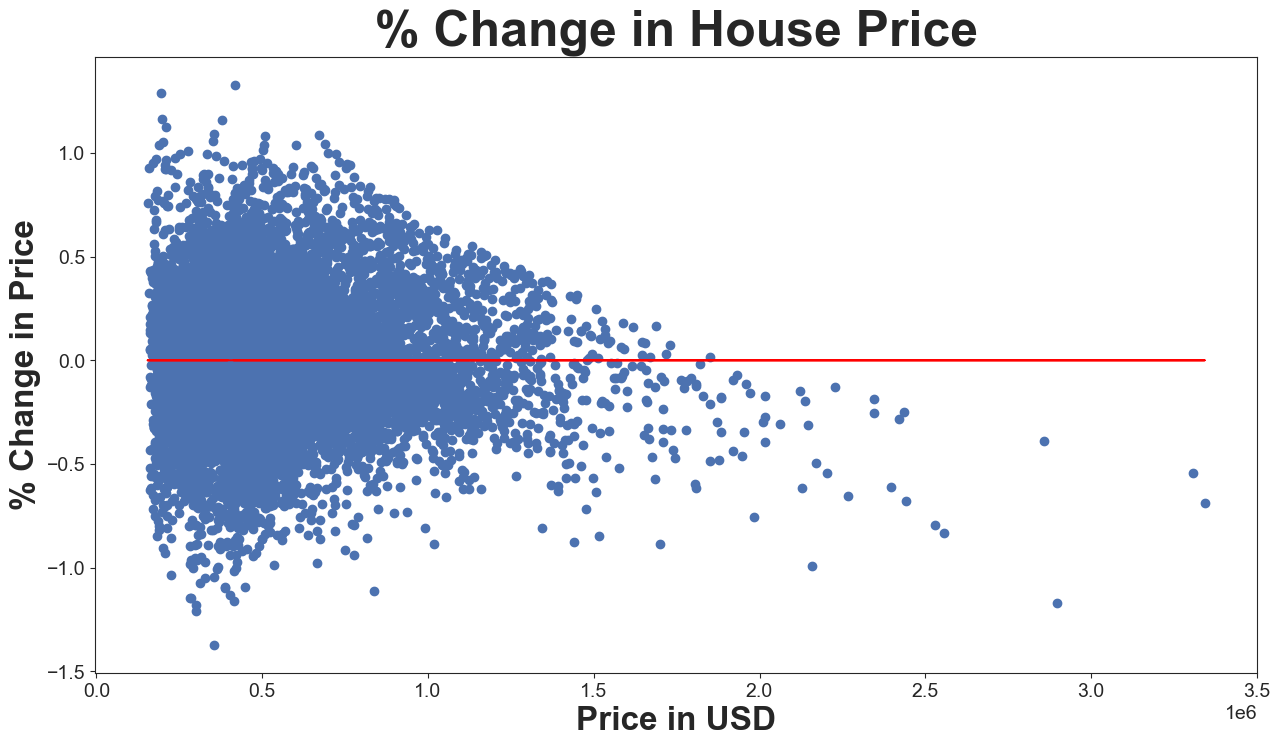

In [169]:
sns.set_style('ticks')
sns.despine()
plt.figure(figsize=(15,8))
plt.scatter(np.exp(final_model.predict(final_model_df[best_features])), final_model.resid)
plt.plot(np.exp(final_model.predict(final_model_df[best_features])), [0 for i in range(len(final_model_df))], color = 'red')
plt.title(label = '% Change in House Price',  fontweight = 'bold', fontsize = 36)
plt.xlabel(xlabel = 'Price in USD',fontweight ='bold', fontsize = 24)
plt.ylabel(ylabel = '% Change in Price', fontweight ='bold', fontsize = 24)
plt.savefig('% change in price')

In [170]:
np.exp(final_model_df.log_price.mean())

456544.28152425773

<Figure size 640x480 with 0 Axes>

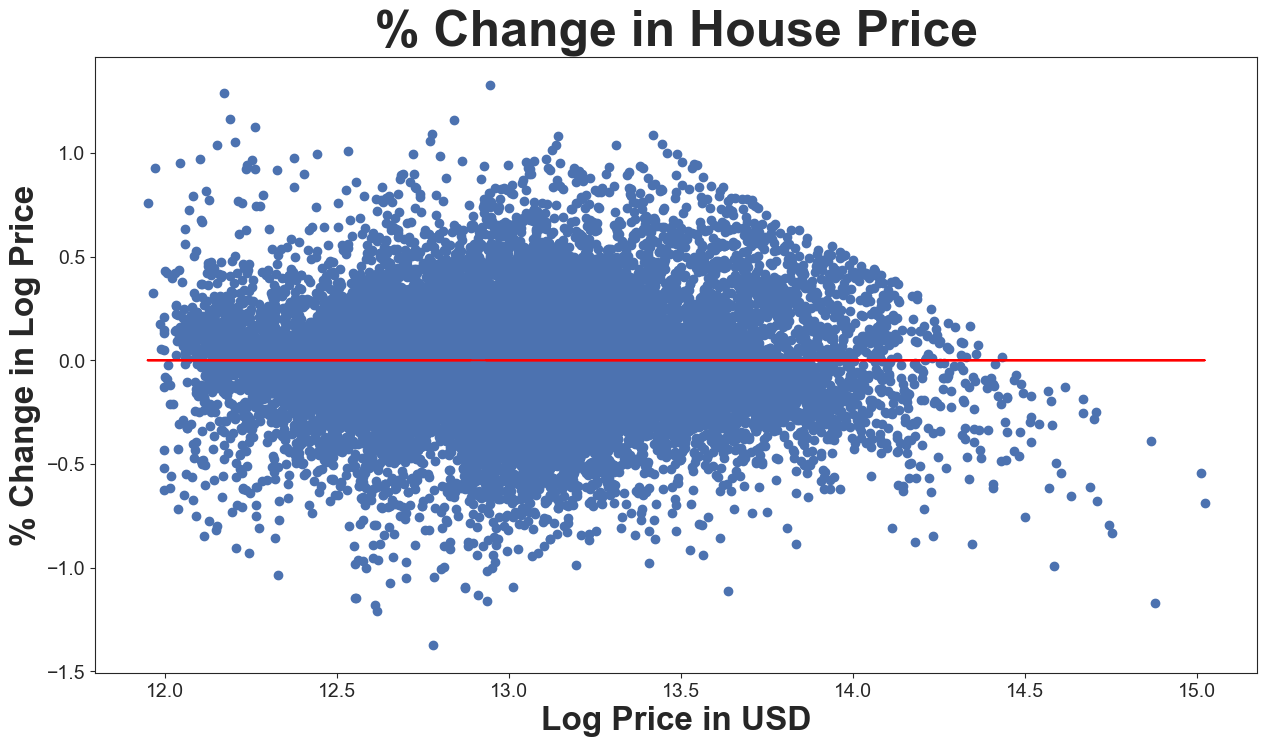

In [182]:
sns.set_style('ticks')
sns.despine()
plt.figure(figsize=(15,8))
plt.scatter(final_model.predict(final_model_df[best_features]), final_model.resid)
plt.plot(final_model.predict(final_model_df[best_features]), [0 for i in range(len(final_model_df))], color = 'red')
plt.title(label = '% Change in House Price',  fontweight = 'bold', fontsize = 36)
plt.xlabel(xlabel = 'Log Price in USD',fontweight ='bold', fontsize = 24)
plt.ylabel(ylabel = '% Change in Log Price', fontweight ='bold', fontsize = 24)
plt.savefig('% change in price')

In [242]:
final_data = {'Key Variables': ['Square Foot Living','Grade 2: Average','Grade 3: Above Average','Grade 4: Excellent','Zipcode: Quad 2','Zipcode: Quad 3','Zipcode: Quad 4','Zipcode: Quad 5','Zipcode: Quad 6','Zipcode: Quad 7','Zipcode: Quad 8','Zipcode: Quad 9','Zipcode: Quad 10','Zipcode: Quad 11','Zipcode: Quad 12'],
             'Coefficient': [0.0003, 0.2013, 0.4200, 0.4512, -0.0778, -0.3378, -0.0377, -0.0355, -0.2265, -0.4331, -0.5408, -0.3321, -0.6747, -0.6297, -0.5376],
             'Percentage Change': [0.0003*100, 0.2013*100, 0.4200*100, 0.4512*100, -0.0778*100, -0.3378*100, -0.0377*100, -0.0355*100, -0.2265*100, -0.4331*100, -0.5408*100, -0.3321*100, -0.6747*100, -0.6297*100, -0.5376*100],
             'Dollar Change': [0.0003*519063.82, 0.2013*519063.82, 0.4200*519063.82, 0.4512*519063.82, -0.0778*519063.82, -0.3378*519063.82, -0.0377*519063.82, -0.0355*519063.82, -0.2265*519063.82, -0.4331*519063.82, -0.5408*519063.82, -0.3321*519063.82, -0.6747*519063.82, -0.6297*519063.82, -0.5376*519063.82],
             'Total': [155.719146+519063.82, 104487.546966+519063.82, 218006.804400+519063.82, 234201.595584+519063.82, -40383.165196+519063.82, -175339.758396+519063.82, -19568.706014+519063.82, -18426.765610+519063.82, -117567.955230+519063.82, -224806.540442+519063.82, -280709.713856+519063.82, -172381.094622+519063.82, -350212.359354+519063.82, -326854.487454+519063.82, -279048.709632+519063.82]}
Final_Model_OLS_df = pd.DataFrame(final_data)
Final_Model_OLS_df

,Key Variables,Coefficient,Percentage Change,Dollar Change,Total
0,Square Foot Living,0.0003,0.03,155.719146,519219.539146
1,Grade 2: Average,0.2013,20.13,104487.546966,623551.366966
2,Grade 3: Above Average,0.4200,42.00,218006.804400,737070.624400
3,Grade 4: Excellent,0.4512,45.12,234201.595584,753265.415584
4,Zipcode: Quad 2,-0.0778,-7.78,-40383.165196,478680.654804
5,Zipcode: Quad 3,-0.3378,-33.78,-175339.758396,343724.061604
6,Zipcode: Quad 4,-0.0377,-3.77,-19568.706014,499495.113986
7,Zipcode: Quad 5,-0.0355,-3.55,-18426.765610,500637.054390
8,Zipcode: Quad 6,-0.2265,-22.65,-117567.955230,401495.864770
9,Zipcode: Quad 7,-0.4331,-43.31,-224806.540442,294257.279558


In [243]:
Final_Model_OLS_df = Final_Model_OLS_df.round({'Dollar Change': 2, 'Total': 2})

In [244]:
Final_Model_OLS_df

,Key Variables,Coefficient,Percentage Change,Dollar Change,Total
0,Square Foot Living,0.0003,0.03,155.72,519219.54
1,Grade 2: Average,0.2013,20.13,104487.55,623551.37
2,Grade 3: Above Average,0.4200,42.00,218006.80,737070.62
3,Grade 4: Excellent,0.4512,45.12,234201.60,753265.42
4,Zipcode: Quad 2,-0.0778,-7.78,-40383.17,478680.65
5,Zipcode: Quad 3,-0.3378,-33.78,-175339.76,343724.06
6,Zipcode: Quad 4,-0.0377,-3.77,-19568.71,499495.11
7,Zipcode: Quad 5,-0.0355,-3.55,-18426.77,500637.05
8,Zipcode: Quad 6,-0.2265,-22.65,-117567.96,401495.86
9,Zipcode: Quad 7,-0.4331,-43.31,-224806.54,294257.28


In [245]:
Final_Model_OLS_df.to_csv('Final_Model_OLS_df.csv')